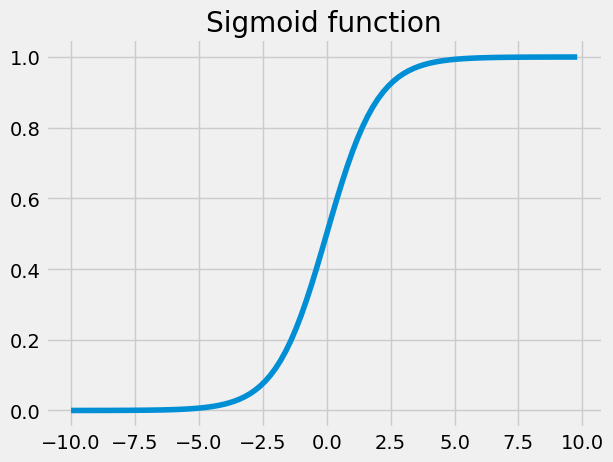

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
vals = np.arange(-10,10,0.2)
gz= 1/(1+np.e**(0-vals))
plt.plot(vals, gz)
plt.title('Sigmoid function');

In [11]:
from numpy import loadtxt, where

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, p):
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

def logistic_gradient_descent(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    loss_history = []

    for _ in range(num_iterations):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        loss = binary_cross_entropy(y, predictions)
        loss_history.append(loss)

    return weights, bias, loss_history

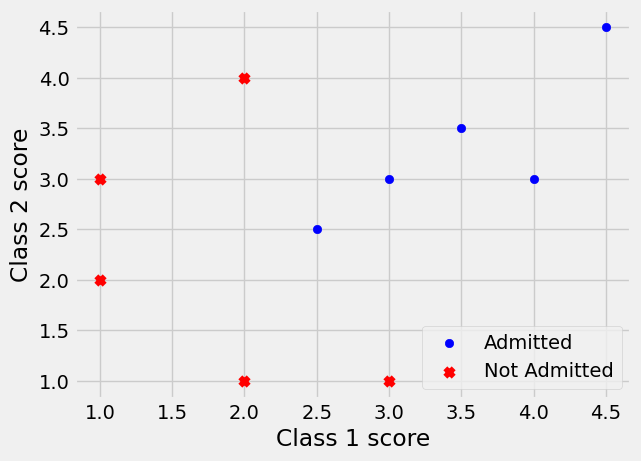

In [13]:
# Set dependent and independent variables
X = [[2.5, 2.5], [1.0, 3.0], [3.0, 1.0], [4.5, 4.5], [2.0, 1.0], [1.0, 2.0], [4.0, 3.0], [3.5, 3.5], [2.0, 4.0], [3.0, 3.0]]
y = [1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
X = np.array(X)
y = np.array(y)

# Find positive and negative cases
pos = where(y == 1)
neg = where(y == 0)

# Plot the data
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Class 1 score')
plt.ylabel('Class 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


Final weights: [1.5691363  0.43780828]
Final bias: -5.105755799220295


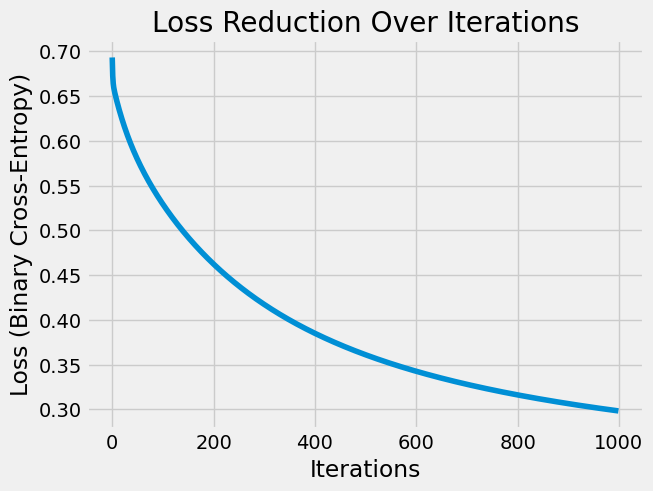

In [14]:
# Run logistic gradient descent
learning_rate = 0.1
num_iterations = 1000
final_weights, final_bias, loss_history = logistic_gradient_descent(X, y, learning_rate, num_iterations)

# Print results
print(f"Final weights: {final_weights}")
print(f"Final bias: {final_bias}")

# Plot loss history
plt.figure()
plt.plot(range(num_iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.title("Loss Reduction Over Iterations")
plt.show()

The number of iterations and the learning rate affect how logistic gradient descent converges. The technique progressively reduces the Binary Cross-Entropy loss with a learning rate of 0.1 and 1000 iterations, guaranteeing steady convergence without overshooting. The model is successfully learning the decision boundary, as evidenced by the loss reduction over iterations. A well-fitted logistic regression model with respectable classification accuracy for the provided data points is produced by the final weights and bias. Accuracy could be further increased, though, by increasing iterations or adjusting the learning rate.